In [10]:
import numpy as np
import pandas as pd
from scipy.stats import poisson, chi2
from scipy import stats
import matplotlib.pyplot as plt
from scipy import optimize
import pickle

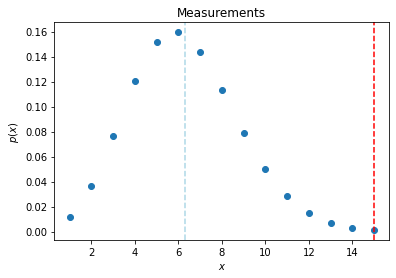

Z = 3.4661629670697414


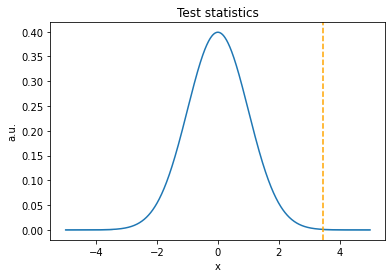

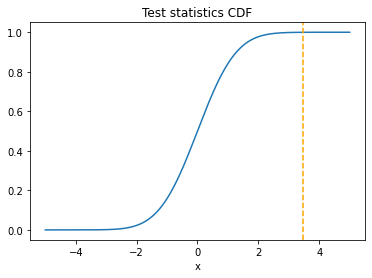

p-value = 0.00026397158691493505
The probability of observing 15 or more hurricances is low


In [3]:
#EX1

x0 = 15
mu = 6.3


x = np.arange(stats.poisson.ppf(0.005, mu), stats.poisson.ppf(0.9995, mu))
t = stats.poisson.pmf(x, mu)
plt.plot(x, t,'o')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

sigma_mu = stats.poisson.std(mu)


Z = (x0 - mu) / sigma_mu
print("Z =", Z)


xs = np.linspace(-5, 5, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()


cs = stats.norm.cdf(xs)
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='orange')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.show()


pvalue = 1. - stats.norm.cdf(Z)

print("p-value =", pvalue)
print("The probability of observing 15 or more hurricances is low")

In [4]:
#EX2

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre)
alpha = 0.05

pre_mean = np.mean(pre)
pre_var = np.var(pre, ddof=1)
post_mean = np.mean(post)
post_var = np.var(post, ddof=1)

sigma=np.sqrt((pre_var + post_var)/2)
t_stat = (pre_mean - post_mean) / (sigma * np.sqrt(2/n))
print("T: ",t_stat)

pvalue = stats.t.cdf(t_stat,n-1) + (1. - stats.t.cdf(-t_stat,n-1))
print("p-value =", pvalue)

if pvalue < alpha:
    print("The change was stathistically significant.")
else:
    print("The change was not stathistically significant.")

T:  -3.786997938137629
p-value = 0.004302464132864604
The change was stathistically significant.


parameters:
 [  6.73581486   2.2944277  132.80882439  15.77936937]
covariance matrix:
 [[ 6.31516789e-03 -2.12259790e-04 -2.15142121e-02  1.91673115e-03]
 [-2.12259790e-04  2.75454778e-02  2.17813738e+00 -1.70946022e-01]
 [-2.15142121e-02  2.17813738e+00  2.03817872e+02 -1.61265094e+01]
 [ 1.91673115e-03 -1.70946022e-01 -1.61265094e+01  1.38442457e+00]]
Mean = 6.74 +- 0.08
var = 2.29 +- 0.17
Scale = 132.81 +- 14.28
Offset = 15.78 +- 1.18
parameters:
 [  7.16452593   1.97590026 260.76391445 -61.32093785]
covariance matrix:
 [[ 2.22850101e-03 -4.92556709e-05 -1.08267364e-02  1.09102374e-03]
 [-4.92556709e-05  5.77328577e-03  8.74436393e-01 -7.06522060e-02]
 [-1.08267364e-02  8.74436393e-01  1.78561132e+02 -1.45310919e+01]
 [ 1.09102374e-03 -7.06522060e-02 -1.45310919e+01  1.41331158e+00]]
Mean = 7.16 +- 0.05
var = 1.98 +- 0.08
Scale = 260.76 +- 13.36
Offset = -61.32 +- 1.19


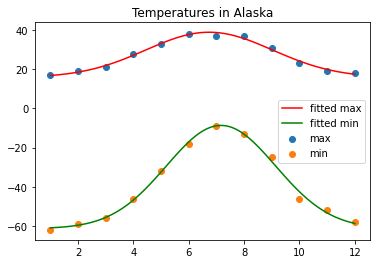

The fit over the period of one year seems to be accurate for both the min and the max temperatures using two gaussian pdf.
The time offsett, so the mean of the two gaussians, is reallty close to 7, so in July for both the temperatures


In [6]:
#EX3


max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])

min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

month = np.arange(12) + 1

x = np.linspace(1,12,100)


mean_max = np.average(month, weights=max)

var_max = np.average((month - mean_max)**2, weights=max)



def gau(x, m, v, A , off):
    return A*stats.norm.pdf(x, loc = m, scale = v) + off



popt_max, pcov_max = optimize.curve_fit(gau, month, max, p0=[mean_max, np.sqrt(var_max), 10, 0], full_output=False)
print("parameters:\n", popt_max)
print("covariance matrix:\n", pcov_max)
print("Mean = %.2f +- %.2f" % (popt_max[0], np.sqrt(pcov_max[0,0])))
print("var = %.2f +- %.2f" % (popt_max[1], np.sqrt(pcov_max[1,1])))
print("Scale = %.2f +- %.2f" % (popt_max[2], np.sqrt(pcov_max[2,2])))
print("Offset = %.2f +- %.2f" % (popt_max[3], np.sqrt(pcov_max[3,3])))


popt_min, pcov_min = optimize.curve_fit(gau, month, min, p0=[popt_max[0], popt_max[1], 10, 0], full_output=False) # we can used values got from the previous oprimization for variance and mean
print("parameters:\n", popt_min)
print("covariance matrix:\n", pcov_min)
print("Mean = %.2f +- %.2f" % (popt_min[0], np.sqrt(pcov_min[0,0])))
print("var = %.2f +- %.2f" % (popt_min[1], np.sqrt(pcov_min[1,1])))
print("Scale = %.2f +- %.2f" % (popt_min[2], np.sqrt(pcov_min[2,2])))
print("Offset = %.2f +- %.2f" % (popt_min[3], np.sqrt(pcov_min[3,3])))
plt.scatter(month, max, label='max')
plt.scatter(month, min, label='min')
plt.plot(x, gau(x, popt_max[0], popt_max[1], popt_max[2], popt_max[3]), color='red', label='fitted max')

plt.plot(x, gau(x, popt_min[0], popt_min[1], popt_min[2], popt_min[3]), color='green', label='fitted min')
plt.legend(loc='best')
plt.title('Temperatures in Alaska')
plt.show()

print('The fit over the period of one year seems to be accurate for both the min and the max temperatures using two gaussian pdf.')
print('The time offsett, so the mean of the two gaussians, is reallty close to 7, so in July for both the temperatures')

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


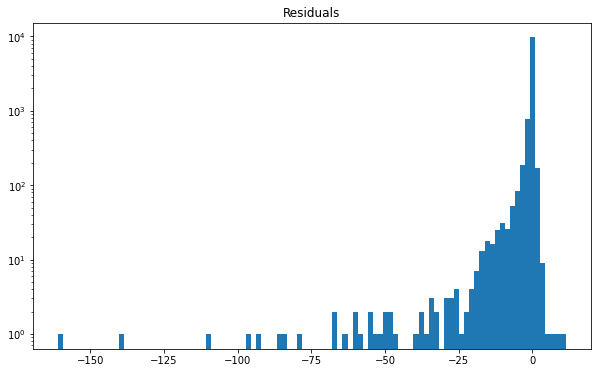

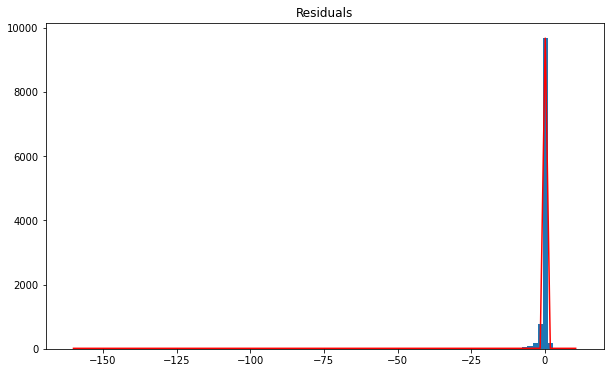

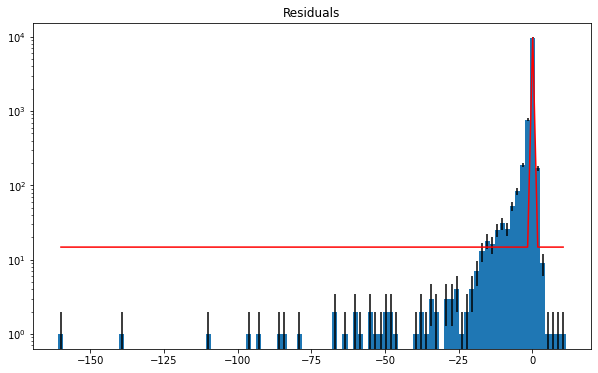

chi2 = 5788.263386769138
p-value = 0.0
p-value is < 0.05, the fit is considered unsatisfactory


In [12]:
#EX4


filename = 'data/residuals_261.pkl'
infile = open(filename, 'rb')
data = pickle.load(infile)
infile.close()
df = pd.DataFrame(data.item())
display(df)
residuals = df['residuals']


plt.figure(figsize = (10,6))
h, bins, _ = plt.hist(residuals,bins=100)
plt.title('Residuals')
plt.yscale('log')
plt.show()


def f(x, baseline, c, mu, sigma):
    return baseline + c * stats.norm.pdf(x, mu, sigma)

bin_centers = 0.5*(bins[1:]+bins[:-1])
sigma = np.sqrt(h)
popt, pcov = optimize.curve_fit(f, bin_centers, h)


x = (np.min(residuals),np.max(residuals),100)
plt.figure(figsize = (10,6))
h, bins, _ = plt.hist(residuals,bins=100)
plt.title('Residuals')
plt.plot(bin_centers,f(bin_centers,*popt),color='red')
plt.show()


plt.figure(figsize = (10,6))
h, bins, _ = plt.hist(residuals,bins=100)
plt.bar(bin_centers, h, width=0, yerr=sigma, label = 'error')
plt.title('Residuals')
plt.yscale('log')
plt.plot(bin_centers,f(bin_centers,*popt),color='red')
plt.show()


mask = np.where(h>0) 
h = h[mask]
sigma = sigma[mask]
bin_centers = bin_centers[mask]


y_fit = f(bin_centers,*popt)
chi2 = np.sum(((h - y_fit)**2) / sigma**2)
print("chi2 =", chi2)

pvalue = 1. - stats.chi2.cdf(chi2, len(popt))
print("p-value =", pvalue)
print('p-value is < 0.05, the fit is considered unsatisfactory')

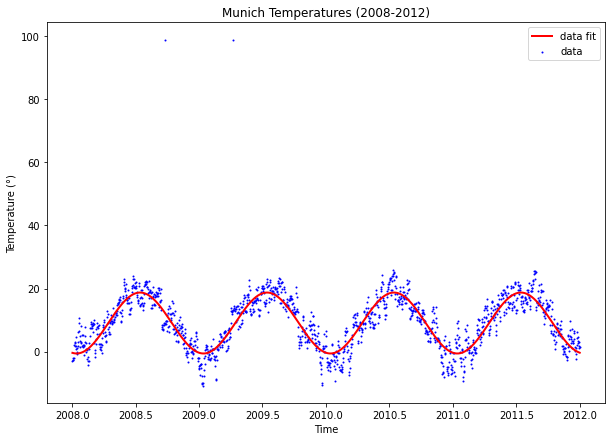


*** Best-fit values of the parameters ***

	 a = -9.671276787357955

	 b = 12.34271734778414

	 c = 9.052562097052185 


*** Overall average temperature in Munich : 8.94 


*** Daily average value predicted by the model ***

	 Hottest time of the year : 18.72°

	 Coldest time of the year : -0.62°


In [13]:
#EX5



def f(t, a, b, c):
    return a * np.cos(2*np.pi*t + b) + c

path = "data/munich_temperatures_average_with_bad_data.txt"
data = np.loadtxt(fname=path)
time = data[:,0]
temperatures = data[:,1]


popt_f, pcov_f = optimize.curve_fit(f, xdata=time, ydata=temperatures)
a_opt_f, b_opt_f, c_opt_f = popt_f


data_fit_f = f(time, a_opt_f, b_opt_f, c_opt_f)


ranged_data_mask = np.bitwise_and(time >= 2008., time <= 2012.)
ranged_time = time[ranged_data_mask]
ranged_temperatures = temperatures[ranged_data_mask]
ranged_data_fit = data_fit_f[ranged_data_mask]

plt.figure(figsize=(10,7))
plt.scatter(ranged_time, ranged_temperatures, c='blue', s=1, label='data')
plt.title("Munich Temperatures (2008-2012)")
plt.ylabel("Temperature (°)")
plt.xlabel("Time")
plt.plot(ranged_time, ranged_data_fit, color='red', linewidth=2, label='data fit')
plt.legend(loc='best')
plt.show()


print(f"\n*** Best-fit values of the parameters ***")
print("\n\t a =", a_opt_f)
print("\n\t b =", b_opt_f)
print("\n\t c =", c_opt_f, "\n")


average_temp = np.mean(data_fit_f)
print("\n*** Overall average temperature in Munich : %0.2f" % average_temp, "\n")

max_temp = np.max(data_fit_f)
min_temp = np.min(data_fit_f)
print(f"\n*** Daily average value predicted by the model ***")
print("\n\t Hottest time of the year : %0.2f°" % max_temp)
print("\n\t Coldest time of the year : %0.2f°" % min_temp)